In [1]:
#Derivation of the Gradient of Cross-Entropy Loss with Respect to the Weights in a Single-Layer Softmax Classifier

#Importing Necessary Libraries
#scikit-learn is a  library for machine learning in Python 



In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
#Loading the Iris DataSet

In [4]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

In [5]:
# One-hot encode the target values
# This is a  preprocessing step for converting labels into
# a format suitable for training machine learning models,

In [6]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

In [7]:
# Split the dataset into training and testing sets
# Here, 20% of the data will be used for testing, and the remaining 80% will be used for training.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normalize the input data
# Normalizing the training and test datasets to a range of [0, 1] 
# helps improve the performance and stability of machine learning models by ensuring that 
# all features have consistent scales, thereby contributing equally to the learning process.

In [10]:
X_train = X_train / np.max(X_train, axis=0)
X_test = X_test / np.max(X_test, axis=0)

In [11]:
#Activation and Loss Functions

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [13]:
#Cross-Entropy Loss

In [14]:
def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred_clipped = np.clip(y_pred, 1e-12, 1. - 1e-12)
    log_probs = -np.log(y_pred_clipped[range(n_samples), np.argmax(y_true, axis=1)])
    loss = np.sum(log_probs) / n_samples
    return loss


In [15]:
#Cross-Entropy Loss Derivative

In [16]:
def cross_entropy_loss_derivative(y_true, y_pred):
    return y_pred - y_true


In [17]:
# Weights and Biases initilisation

In [18]:
input_layer_neurons = X_train.shape[1]
hidden_layer_neurons = 5
output_layer_neurons = y_train.shape[1]


In [19]:
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
output_bias = np.random.uniform(size=(1, output_layer_neurons))

In [20]:
# Training Parameters

In [34]:
learning_rate = 0.001
epochs = 10000
loss_values = []

In [35]:
# Forward and Backward Propagation

In [40]:
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(X_train, hidden_weights) + hidden_bias
    hidden_layer_activation = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_activation, output_weights) + output_bias
    predicted_output = softmax(output_layer_input)

    # Compute the loss
    loss = cross_entropy_loss(y_train, predicted_output)

    # Backward Propagation
    error = cross_entropy_loss_derivative(y_train, predicted_output)
    d_predicted_output = error

    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)

    # Update weights and biases
    # Subtract the gradient from the current weights to update them. 
    # This step reduces the loss by moving the weights in the direction opposite to the gradient.
    
    output_weights -= hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
    output_bias -= np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    hidden_weights -= X_train.T.dot(d_hidden_layer) * learning_rate
    hidden_bias -= np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        loss_values.append(loss)
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 0.048117000512752695
Epoch 1000, Loss: 0.04805068173286294
Epoch 2000, Loss: 0.047988946755945415
Epoch 3000, Loss: 0.04793140263856545
Epoch 4000, Loss: 0.04787769616527497
Epoch 5000, Loss: 0.04782750913492319
Epoch 6000, Loss: 0.04778055429995586
Epoch 7000, Loss: 0.047736571854684114
Epoch 8000, Loss: 0.04769532638715125
Epoch 9000, Loss: 0.04765660422419463


In [37]:
# Testing the neural network
hidden_layer_input = np.dot(X_test, hidden_weights) + hidden_bias
hidden_layer_activation = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_activation, output_weights) + output_bias
predicted_output = softmax(output_layer_input)

In [38]:
# Calculate accuracy
# argmax(𝑝)=index of the maximum element in 𝑝
argmax(p)=index of the maximum element in p
predicted_labels = np.argmax(predicted_output, axis=1)
true_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predicted_labels == true_labels)
print("Test accuracy:", accuracy)

Test accuracy: 0.9666666666666667


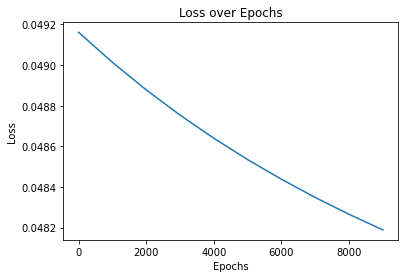

In [39]:
import matplotlib.pyplot as plt

plt.plot(range(0, epochs, 1000), loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()